In [1]:
import os
import numpy as np
import pandas as pd


# plotting modules
import matplotlib.colors as colors
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
categories = ["peaks", "notpeaks", "responsive", "nonresponsive", "induced", "repressed"]
ko_lines = ["ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]
store_dir = "../data/"

def get_file_length(filename):
    with open(filename, "r") as f:
        length = len(f.readlines())
    return length

In [4]:
def create_number_table(store_dir, ko_lines, categories):
    data_dict = {c:[] for c in categories}
    for ko in ko_lines:
        for cat in categories:
            filename = os.path.join(store_dir, ko, f"{cat}.bed")
            cat_len = get_file_length(filename)
            data_dict[cat].append(cat_len)
    df = pd.DataFrame(data=data_dict)
    df["library"] = ko_lines
    return df

In [5]:
df = create_number_table(store_dir, ko_lines, categories)

# Percent response

In [6]:
response_df = df.loc[df.library!="16P12_1", ["library", "responsive", "nonresponsive"]]
response_df["percent_response"] = round(response_df.responsive*100/(response_df.responsive + response_df.nonresponsive), 3)

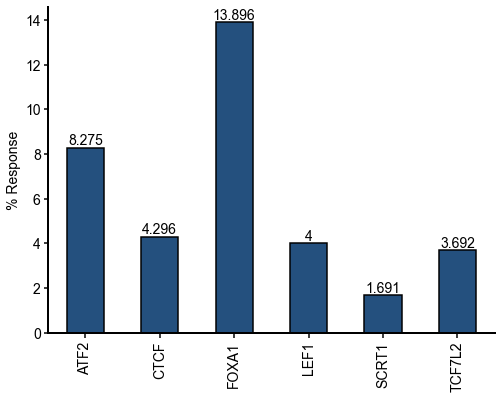

In [7]:
fig, axes = plt.subplots(figsize=(8,6))

g = sns.barplot(
    data=response_df, x="library", y=f"percent_response", palette=["#15508d"],  #
    log=False, ax=axes, edgecolor="k", linewidth=1.5)

g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation=90)

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

# Set these based on your column counts
columncounts = [5 for i in range(len(ko_lines[:-1]))]

widthbars = normaliseCounts(columncounts,10)

for bar,newwidth in zip(axes.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

for i in g.containers:
    g.bar_label(i,);

axes.spines[["right", "top"]].set_visible(False)
axes.set_xlabel("")
axes.set_ylabel(f"% Response");

In [8]:
save_file = "../data/figures/percent_response.pdf"
save_pdf(save_file, fig)

# Induced repressed

In [9]:
induced_repressed_df = df.loc[df.library!="16P12_1", ["library", "repressed", "induced"]]

In [10]:
plot_df = induced_repressed_df.melt(id_vars=["library"], value_vars=["repressed", "induced"], var_name="Response type", value_name="Fragment count")

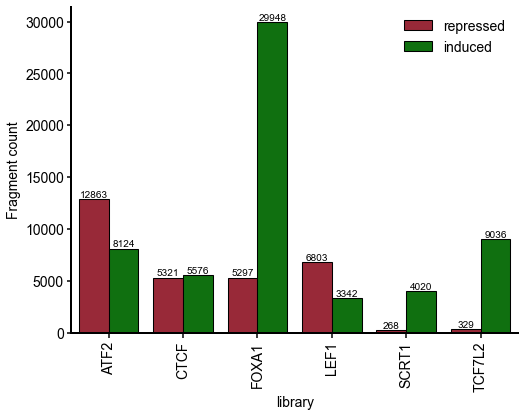

In [11]:
fig, axes = plt.subplots(figsize=(8,6))

g = sns.barplot(
    data=plot_df, x="library", y="Fragment count", 
    hue="Response type", palette=["#ab162a", "green"], hue_order=["repressed", "induced"],  #
    log=False, ax=axes, edgecolor="k", linewidth=1.05)

g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation=90)

for i in g.containers:
    g.bar_label(i,fontsize=10);

axes.spines[["right", "top"]].set_visible(False)
axes.legend(frameon=False)

In [12]:
save_file = "../data/figures/induced_repressed.pdf"
save_pdf(save_file, fig)